In [396]:
from random import random, randint
from Inertia import normal, arange
from math import pi, sin, cos, sqrt, log, exp, gamma
import itertools
import matplotlib.pyplot as plt
from timeit import timeit
plt.style.use("ggplot")

In [2]:
# Rosenbrock Function
# only valid when input is a 2-dim vector, v=(x,y)
def rosen(x, y, order=None):
    
    a = 1
    b = 100
    
    # function value
    if order == None:
        f = (a-x**2)+b*(y-x**2)**2
        return f
    
    # Jacobian
    elif order == "jaco":
        Jx = -2*(a-x) + 2*b*(y-x**2)*(-2*x)
        Jy = 2*b*(y-x**2)
        J = [Jx, Jy]
        return J
    
    # Hessian
    elif order == "hess":
        Hxx = 2 - 4*b*(y-x**2) - 4*b*x*(-2*x)
        Hxy = Hyx = -4*b*x
        Hyy = 2*b
        H = [[Hxx, Hxy], [Hyx, Hyy]]
        return H
    
    else:
        return None  

In [3]:
# Optimization(Gradient Descent)
# only valid when input is a 2-dim vector, v=(x,y)
def optim(f, x0, method="grad"):
    
    if method=="grad":
        
        # Initial value
        x = x0[0]
        y = x0[1]

        # Setup
        h = 0.0001
        n = 100000
        eps = 1e-5

        # Loop
        for i in range(n):
            # Update
            J = rosen(x, y, "jaco")
            x = x-h*J[0]
            y = y-h*J[1]

            # Tolerance
            tol = sqrt(J[0]**2 + J[1]**2)
            if(tol < eps):
                break
        return [x, y]
    
    else:
        return None

In [227]:
# Multivariate normal distribution
# only valid when input is a 2-dim vector, v=(x,y)
def gaussian(p, **kwargs):
    mu = kwargs['mu']
    cov = kwargs['cov']
    
    det = cov[0][0]*cov[1][1] - cov[1][0]*cov[0][1]
    cov_inv = [[cov[1][1]/det, -cov[0][1]/det], [-cov[1][0]/det, cov[0][0]/det]]
    v = [p[0]-mu[0], p[1]-mu[1]]
    dist = v[0]*(v[0]*cov_inv[0][0]+v[1]*cov_inv[1][0]) + v[1]*(v[0]*cov_inv[0][1]+v[1]*cov_inv[1][1])
    z = exp(-dist/2)/(2*pi*sqrt(det))
    return z

In [416]:
# Metropolis-Hastings
def metropolis(density, x0, n=1000, burn_in=100, thin=5, **kwargs):
    # Multivarate normal distribution
    if density.__name__ == "gaussian":
        # Setting
        mu = kwargs['mu']
        cov = kwargs['cov']

        # Initial value
        x = x0[0]
        y = x0[1]
        
        # Loop
        trace = []
        for _ in range(n):
            xp = normal(1, mu=x, sigma=3)
            yp = normal(1, mu=y, sigma=3)    
            alpha = min(1,density([xp, yp], mu=mu, cov=cov)/density([x, y], mu=mu, cov=cov))
            u = random()
            if (u < alpha):
                x = xp
                y = yp
            trace.append([x,y])
            
        return trace[burn_in::thin]
    
    # For test
    elif density.__name__ == "test":
        # Setting
        m = kwargs['m']

        # Initial value
        x = x0
        
        # Loop
        trace = []
        for _ in range(n):
            xp = normal(1, mu=x, sigma=1)  
            alpha = min(1, density(xp, n=m)/density(x, n=m))
            u = random()
            if (u < alpha):
                x = xp
            trace.append(x)
            
        return trace[burn_in::thin]
    
    else:
        return None

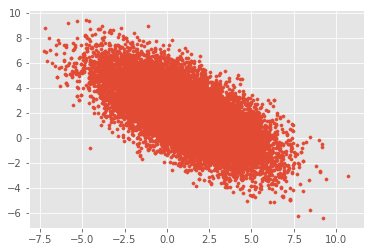

In [417]:
x0 = [4,3]
param = {'mu':[1,2], 'cov':[[5,-3],[-3,4]]}
p = metropolis(density=gaussian,
               x0=x0,
               n=100000,
               burn_in=100,
               thin=5,
               mu=param['mu'],
               cov=param['cov'])

plt.scatter([x for x, y in p], [y for x, y in p], s=10)
plt.show()

In [436]:
def test(rate, n=1):
    k = 3
    theta = 10
    return rate**(k-1)*exp(-rate/theta)*exp(-rate)*rate**n

In [454]:
m = 13
p = metropolis(density=test,
               x0 = 3,
               n=100000,
               burn_in=100,
               thin=5,
               m=m)

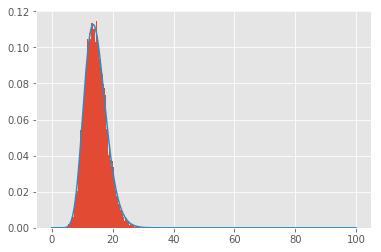

In [455]:
D = arange(0,100,1000)
k_p = k+m
theta_p = theta/(1+theta)
y = [x**(k_p-1)*exp(-x/theta_p)/(gamma(k_p)*theta_p**k_p) for x in D]
plt.hist(p, bins=100, density=True)
plt.plot(D, y)
plt.show()